# PROJE ÖDEVİ 1
## Name - Surname : Bünyamin Berat GEZER
### Student ID : 210102002061

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


Function for Question 1 :

\$ 𝑓_1(𝑥)=𝑥^2−11𝑥+24.96 \$




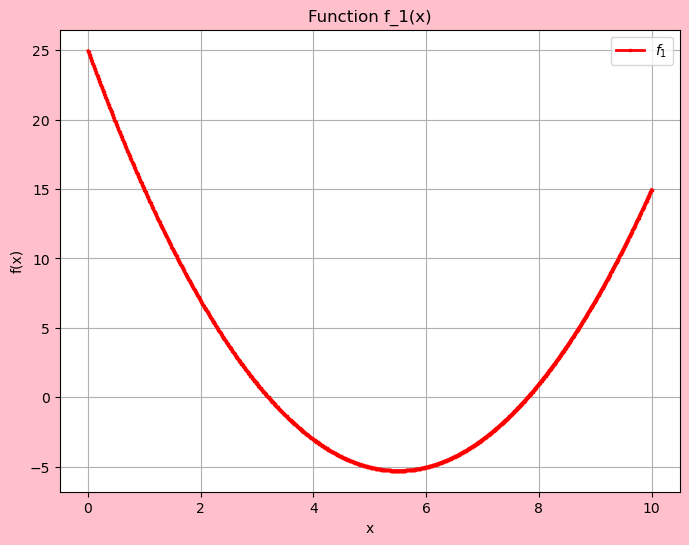

In [2]:


x = np.linspace(0, 10, 1000)

def f_1(x):                        #f_1(x) function
    return (x**2 - 11*x + 24.96)

y1 = f_1(x)


plt.figure(figsize=(8,6), facecolor="pink")
plt.plot(x, y1, label="$f_1$", color="red", marker="s", linestyle="solid", linewidth=2, markersize=2)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function f_1(x)")
plt.legend()  
plt.grid()


# First of all, ı have created the graphic for f_1(x) function

In [3]:
# When I look at the graph, I see that the first root is closer to 4 in the range (2,4) and the second root is closer to
#8 in the range (6,8). I estimate the first root as 3.2 and the second root as 7.3.

# estimation of f_1(x) funticon roots :

estimation_root=[7.5,3.2]

### At the end of each function, sample inputs were given for the outputs and tests were performed to see whether the correct results were obtained in different ranges.

In [4]:
def find_root(a=1, b=-11, c=24.96):        # find roots this function
    delta = b**2 - 4*a*c                        
    list_root = []

    if delta > 0:                           # control delta 
        root1 = (-b + delta**0.5) / (2*a)
        root2 = (-b - delta**0.5) / (2*a)
        list_root.append(root1)                 # add list root1
        list_root.append(root2)                 # add list root2
    
        return list_root 
    elif delta == 0:                           # control delta           
        root = -b / (2*a)
        list_root.append(root)
        return list_root


print(find_root())

# I found the roots of  function(f_1(x)) this function 


[7.8, 3.2]


In [5]:
table = [["Root Numbers(x)", "Estimated Roots", "Real Roots"]]
root_number = [1, 2]                # root numbers
real_roots = find_root()            # list of real numbers 
est_root = [estimation_root[0], estimation_root[1]]   # list of estimated numbers 

# Compare the real roots with the roots estimated by looking at the graph.
for i in range(len(root_number)):             
    table.append([root_number[i], est_root[i], real_roots[i]])

print(tabulate(table, headers="firstrow", tablefmt="rst", numalign="center"))

=================  =================  ============
 Root Numbers(x)    Estimated Roots    Real Roots
=================  =================  ============
        1                 7.5             7.8
        2                 3.2             3.2
=================  =================  ============


In [6]:
# Bisection function
def bisection(function, number_range):
    tolerance = 0.000000001  # tolerance value 10^9
    tf = True
    iteration_list = number_range.copy()  
    n = 0
    board_iteration_list = []       # value of iteration steps
    iteration_list_step = []        # iteration steps 
    while tf:
        n += 1                                # iteration steps
        x_1 = iteration_list[0]               # first element of range    
        x_2 = iteration_list[1]               # second element of range 
        x_3 = (x_1 + x_2) / 2                 # divide first and second values for approving real root
        board_iteration_list.append(x_3)      # keep iteration value  
        if (function(x_1) > 0 and function(x_3) < 0) or (function(x_1) < 0 and function(x_3) > 0):    
            #Checking which range the root is in 
            iteration_list.clear()
            iteration_list.append(min(x_1, x_3)) 
            # determining min value for  new range  
            iteration_list.append(max(x_1, x_3)) 
            # determining max  value for  new range
            if abs((max(iteration_list) - min(iteration_list)) / 2 ** n) < tolerance: 
                # in control according to the tolerance value. If it gets close to the root, we will exit the loop.
                break
        elif (function(x_2) > 0 and function(x_3) < 0) or (function(x_2) < 0 and function(x_3) > 0): 
            #  #Checking which range the root is in
            iteration_list.clear()
            iteration_list.append(min(x_2, x_3))  # determining min value for  new range
            iteration_list.append(max(x_2, x_3))  # determining max  value for  new range
            if abs((max(iteration_list) - min(iteration_list)) / 2 ** n) < tolerance:
                # in control according to the tolerance value. If it gets close to the root, we will exit the loop.
                break
        else:
            attention = " does not approach the tolerance value." 
            # if we do not have any root in range , ı will print this string .
            return f"{attention}"

    for i in range(n):                                                            # add iteration step in list 
        iteration_list_step.append(i) 
           
    table = [["Bisection Iteration Step", "x", "Tolerance"]]                      # show value and iteration step in table 
    
    for i in range(len(iteration_list_step)):
        table.append([iteration_list_step[i]+1, board_iteration_list[i], tolerance])
    
    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")

print(bisection(f_1, number_range=[6,8]))

==========================  =======  ===========
 Bisection Iteration Step      x      Tolerance
==========================  =======  ===========
            1                  7        1e-09
            2                 7.5       1e-09
            3                7.75       1e-09
            4                7.875      1e-09
            5               7.8125      1e-09
            6               7.78125     1e-09
            7               7.79688     1e-09
            8               7.80469     1e-09
            9               7.80078     1e-09
            10              7.79883     1e-09
            11              7.7998      1e-09
            12              7.80029     1e-09
            13              7.80005     1e-09
            14              7.79993     1e-09
            15              7.79999     1e-09
            16              7.80002     1e-09
==========================  =======  ===========


In [7]:
def f1_derivative(func, x, h=0.0000001):
    return (func(x + h) - func(x - h)) / (2 * h)   # find any function's derivative

In [8]:
def newton(function, number_range):
    tolerance = 0.000000001         # tolerance value
    tf = True                       # loop control
    iteration_list = []             # value of iteration steps
    iteration_list_step = []        # iteration steps

    n = 0
    xn = min(number_range)          # min value of number range 

    while tf:
        n += 1
        x_iteration = xn - function(xn) / f1_derivative(function, xn)   # rule of newton method
        iteration_list.append(x_iteration)                              # add iteration value in list  

        if abs(x_iteration - xn) < tolerance:                          
            break
        else:                # in control according to the tolerance value. If it gets close to the root, we will exit the loop.
            xn = x_iteration                      

    for i in range(n):
        iteration_list_step.append(i)                                   # add iteration step in list 

    table = [["Newton Iteration Step", "x", "Tolerance"]]

    for i in range(n):                                                 # show value and iteration step in table 
        table.append([i+1, iteration_list[i], tolerance])

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")


print(newton(f_1, number_range=[6,8]))

=======================  =======  ===========
 Newton Iteration Step      x      Tolerance
=======================  =======  ===========
           1              11.04      1e-09
           2             8.74744     1e-09
           3             7.93821     1e-09
           4             7.80392     1e-09
           5               7.8       1e-09
           6               7.8       1e-09
           7               7.8       1e-09
=======================  =======  ===========


In [9]:
def secant(function, number_range):
    tolerance = 0.000000001            # tolerance value
    tf = True                          # loop control
    iteration_list = []                # value of iteration steps
    iteration_list_step = []          

    n = 0                               # iteration steps
    [xn_1, xn] = number_range           # range 

    while tf:
        n += 1
        x_iteration = xn - (function(xn) * (xn - xn_1)) / (function(xn) - function(xn_1))  # apply secant rule 
        iteration_list.append(x_iteration)                                                 # iteration value add in list 

        if abs(x_iteration - xn) < tolerance:
            break                                         
            # in control according to the tolerance value if we have corret root break loop.
        else:
            
            xn_1, xn = xn, x_iteration

    for i in range(n):                                     # iteration step add in list 
        iteration_list_step.append(i)

    table = [["Secant Iteration Step", "x", "Tolerance"]]

    for i in range(n):                                                    # show values in table
        table.append([i+1, iteration_list[i], tolerance])

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")

print(secant(f_1, [6, 8]))  


=======================  =======  ===========
 Secant Iteration Step      x      Tolerance
=======================  =======  ===========
           1              7.68       1e-09
           2             7.79487     1e-09
           3             7.80014     1e-09
           4               7.8       1e-09
           5               7.8       1e-09
           6               7.8       1e-09
=======================  =======  ===========


In [10]:
def g_1(x):
    return (11 * x - 24.96) / x   # leave x alone


def g_3(x):
    if x == 0:                        # leave x alone
        return 0
    return (x ** 2 / 11) + (24.96 / 11)   



def fixed_point_iteration(initial_guess,max_iterations=1000,func=g_3):
    tf = True                     # control 
    iteration_list = []           # step of iteration value 
    tolerance = 0.000000001       # tolerance 
    n = 0                         # step
    x = initial_guess             #initial guess

    while (tf) and (n < max_iterations):   # in control according to the tolerance value if we have corret root break loop           #
        n += 1
        x_iteration = func(x)                 # Use the provided function here
        iteration_list.append(x_iteration)

        if abs(x_iteration - x) < tolerance:      # control with tolerance 
            break
        else:
            x = x_iteration

    table = [["Fixed Point Iteration Step", "x", "Tolerance"]]         # show all value in table . 

    for i in range(n):                                              
        table.append([i + 1, iteration_list[i], tolerance])

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")





print(fixed_point_iteration(3.0, func=g_3))


print(fixed_point_iteration(3.0, func=g_1))

============================  =======  ===========
 Fixed Point Iteration Step      x      Tolerance
============================  =======  ===========
             1                3.08727     1e-09
             2                3.13557     1e-09
             3                3.16289     1e-09
             4                3.17853     1e-09
             5                3.18755     1e-09
             6                3.19277     1e-09
             7                3.1958      1e-09
             8                3.19756     1e-09
             9                3.19858     1e-09
             10               3.19917     1e-09
             11               3.19952     1e-09
             12               3.19972     1e-09
             13               3.19984     1e-09
             14               3.19991     1e-09
             15               3.19994     1e-09
             16               3.19997     1e-09
             17               3.19998     1e-09
             18               3.

While the 7.8 root can be reached with the Fixed Point Iteration method, my code cannot fit the 3.2 root in a healthy way. When I tried different approaches, I got overflow and different errors. I tried to use a different g(x) function, but this time I had problems finding the root 3.2 and approaching the root 7.8. As a result, the fixed point iteration method cannot find the roots well.

In [11]:
def all_methods_and_relative_error(bisection_value, newton_value, secant_value, fixed_pointed_iteration_value, real_root):

    value_list = [bisection_value, newton_value, secant_value, fixed_pointed_iteration_value]
    relative_error_list = []

    for value in value_list:
        relative_error = abs(value - real_root) / real_root  # find relative errors
        relative_error_list.append(relative_error)  # add relative errors in list

    table = [["Method","Your Roots","Real Roots","Relative Error"],
             ["Bisection", value_list[0], real_root, relative_error_list[0]],
             ["Newton", value_list[1], real_root, relative_error_list[1]],
             ["Secant", value_list[2], real_root, relative_error_list[2]],
             ["Fixed Point Iteration", value_list[3], real_root, relative_error_list[3]]]

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")

print(all_methods_and_relative_error(bisection_value=7.80002, newton_value=7.8, secant_value=7.8,
                                     fixed_pointed_iteration_value=7.8, real_root=7.8))

=====================  ============  ============  ================
Method                  Your Roots    Real Roots    Relative Error
=====================  ============  ============  ================
Bisection                7.80002         7.8          2.5641e-06
Newton                     7.8           7.8              0
Secant                     7.8           7.8              0
Fixed Point Iteration      7.8           7.8              0
=====================  ============  ============  ================


Among the methods, I see the secant method as the best and fastest solution,
but since I cannot fully do the fixed iteration point method, secant is the best among bisection, newton and secant.
While I obtained full roots among the methods except the bisection method, I found approximately one root in bisection. 
I found that 10^-12 was the closest tolerance value. But I chose my tolerance value as 10^-9. For the values in the iteration 
steps, while the bisection approaches the real root within the range, the probability of leaving the range in newton, secant and fixed point iteration
can also approach the real root.


Function for Question 2 :

\$ 𝑓_2(𝑥)=0.2𝑡^2[𝑐𝑜𝑠(2.5𝑡)𝑒𝑥𝑝(−3.2𝑡)+𝑠𝑖𝑛(𝑡^2)] \$

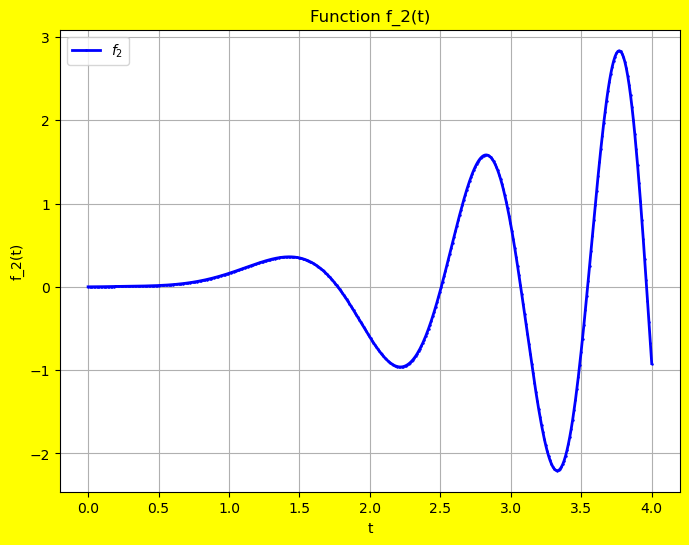

In [12]:

t = np.linspace(0, 4, 400)


def f_2(t):
    return 0.2 * t**2 * (np.cos(2.5*t) * np.exp(-3.2*t) + np.sin(t**2))         # Function for question 2
y2 = f_2(t)




plt.figure(figsize=(8,6), facecolor="yellow")
plt.plot(t, y2, label="$f_2$", color="blue", marker="s", linestyle="solid", linewidth=2, markersize=0.75)
plt.xlabel("t")
plt.ylabel("f_2(t)")
plt.title("Function f_2(t)")
plt.legend()  
plt.grid()
plt.show()

In [13]:
# estimation of f_2(x) function roots:
estimation_root=[1.7,2.5,3.1,3.6,4.0]


When I look at the graph, I detect 5 values that make the f_ 2(x) function zero. my guess is that the roots consist of
[1.7, 2.5 3.1 , 3.6 , 4.0 ]

In [14]:
# Bisection function
def bisection_2(function, number_range):
    tolerance = 0.000000001                    # tolerance value 10^9
    tf = True
    iteration_list = number_range.copy()    
    n = 0                                      
    board_iteration_list = []                     # value of roots of iteration steps
    iteration_list_step = []                      # value of iteration steps

    while tf:
        n += 1                             # iteration steps
        x_1 = iteration_list[0]            # first element of range
        x_2 = iteration_list[1]            # second element of range
        x_3 = (x_1 + x_2) / 2              # divide first and second values for approving real root
        board_iteration_list.append(x_3)   # keep iteration value 
        if (function(x_1) > 0 and function(x_3) < 0) or (function(x_1) < 0 and function(x_3) > 0):  
            #Checking which range the root is in 
            iteration_list.clear()
            iteration_list.append(min(x_1, x_3))
            iteration_list.append(max(x_1, x_3))
            if abs((max(iteration_list) - min(iteration_list)) / 2 ** n) < tolerance:
                # in control according to the tolerance value. If it gets close to the root, we will exit the loop.
                break
        elif (function(x_2) > 0 and function(x_3) < 0) or (function(x_2) < 0 and function(x_3) > 0):
            #Checking which range the root is in 
            iteration_list.clear()
            iteration_list.append(min(x_2, x_3)) # determining min value for  new range 
            iteration_list.append(max(x_2, x_3)) # determining max  value for  new range
            if abs((max(iteration_list) - min(iteration_list)) / 2 ** n) < tolerance: 
                # in control according to the tolerance value. If it gets close to the root, we will exit the loop.
                break
        else:
            attention = " does not approach the tolerance value." 
            # if we do not have any root in range , ı will print this string .
            return f"{attention}" 

    for i in range(n):                                      # add iteration step in list 
        iteration_list_step.append(i)

    table = [["Bisection Iteration Step", "x", "Tolerance"]]          # show value and iteration step in table 

    for i in range(len(iteration_list_step)):
        table.append([iteration_list_step[i] + 1, board_iteration_list[i], tolerance])

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")




print(bisection_2(f_2, [3.5,3.7]))
print(bisection_2(f_2, [1.5,2.0]))
print(bisection_2(f_2, [3.8,4]))

==========================  =======  ===========
 Bisection Iteration Step      x      Tolerance
==========================  =======  ===========
            1                 3.6       1e-09
            2                3.55       1e-09
            3                3.525      1e-09
            4               3.5375      1e-09
            5               3.54375     1e-09
            6               3.54688     1e-09
            7               3.54531     1e-09
            8               3.54453     1e-09
            9               3.54492     1e-09
            10              3.54473     1e-09
            11              3.54482     1e-09
            12              3.54487     1e-09
            13              3.5449      1e-09
            14              3.54491     1e-09
==========================  =======  ===========
==========================  =======  ===========
 Bisection Iteration Step      x      Tolerance
==========================  =======  ===========
            1  

In [15]:
def f2_derivative(function, t):
    h = 0.0000000001                                             #find f_2(t) derivative for nenwton and secant methods . 
    return (function(t + h) - function(t - h)) / (2 * h)


In [16]:
def newton_2(function, number_range):
    tolerance = 0.000000001       # tolerance value
    tf = True                     # loop control
    iteration_list = []           # value of iteration steps
    iteration_list_step = []      # iteration steps

    n = 0                         # keeping iteration number
    xn = min(number_range)        # min value of number range 

    while tf:
        n += 1
        x_iteration = xn - function(xn) / f2_derivative(function, xn)      # rule of newton method
        iteration_list.append(x_iteration)                                 # add iteration value in list

        if abs(x_iteration - xn) < tolerance:                             
            # in control according to the tolerance value. If it gets close to the root, we will exit the loop.
            break
        else:
            xn = x_iteration

    for i in range(n):
        iteration_list_step.append(i)                                     # add iteration step in list

    table = [["Newton Iteration Step", "x", "Tolerance"]]

    for i in range(n):                                                   # show value and iteration step in table 
        table.append([i+1, iteration_list[i], tolerance])

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")


print(newton_2(f_2, [3.5,3.7]))
print(newton_2(f_2, [1.9,2.6]))
print(newton_2(f_2, [3.9,4.0]))




=======================  =======  ===========
 Newton Iteration Step      x      Tolerance
=======================  =======  ===========
           1             3.54805     1e-09
           2             3.54492     1e-09
           3             3.54491     1e-09
           4             3.54491     1e-09
=======================  =======  ===========
=======================  =======  ===========
 Newton Iteration Step      x      Tolerance
=======================  =======  ===========
           1             1.78307     1e-09
           2             1.77234     1e-09
           3             1.77218     1e-09
           4             1.77218     1e-09
           5             1.77218     1e-09
=======================  =======  ===========
=======================  =======  ===========
 Newton Iteration Step      x      Tolerance
=======================  =======  ===========
           1             3.97228     1e-09
           2             3.96336     1e-09
           3            

In [17]:
def secant_2(function, number_range):
    tolerance = 0.000000001                          # tolerance value
    tf = True                                        # loop control
    iteration_list = []                              # value of roots of iteration steps
    iteration_list_step = []

    n = 0                                            # keeping iteration number
    [xn_1, xn] = number_range                        # range

    while tf:
        n += 1
        x_iteration = xn - (function(xn) * (xn - xn_1)) / (function(xn) - function(xn_1))      # apply secant rule 
        iteration_list.append(x_iteration)                                                     # iteration value add in list

        if abs(x_iteration - xn) < tolerance:                                                    
            # in control according to the tolerance value if we have corret root break loop.
            break
        else:
            xn_1, xn = xn, x_iteration

    for i in range(n):                                                                 # iteration step add in list 
        iteration_list_step.append(i)

    table = [["Secant Iteration Step", "x", "Tolerance"]]

    for i in range(n):                                                                    # show values in table
        table.append([i+1, iteration_list[i], tolerance])

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")

print(secant_2(f_2, [3.5,3.7]))
print(secant_2(f_2, [1.6,1.8]))
print(secant_2(f_2, [3.9,4.0]))

=======================  =======  ===========
 Secant Iteration Step      x      Tolerance
=======================  =======  ===========
           1             3.54718     1e-09
           2             3.54463     1e-09
           3             3.54491     1e-09
           4             3.54491     1e-09
           5             3.54491     1e-09
=======================  =======  ===========
=======================  =======  ===========
 Secant Iteration Step      x      Tolerance
=======================  =======  ===========
           1             1.76267     1e-09
           2             1.77182     1e-09
           3             1.77219     1e-09
           4             1.77218     1e-09
           5             1.77218     1e-09
           6             1.77218     1e-09
=======================  =======  ===========
=======================  =======  ===========
 Secant Iteration Step      x      Tolerance
=======================  =======  ===========
           1            

def fixed_point_iteration_2(initial_guess):
    tf = True
    iteration_list = []
    tolerance = 0.000000001
    n = 0
    x = initial_guess                          # initial guess

    def inverse_f_2(t):                        # inverse for f_2(x)  
        return np.real(np.sqrt(t / (0.2 * np.cos(2.5*t) * np.exp(-3.2*t) + 0.2 * np.sin(t**2))))

   
  
    if abs((inverse_f_2(x) - inverse_f_2(inverse_f_2(x))) / (x - inverse_f_2(x))) < 1 and abs((inverse_f_2(x) - inverse_f_2(inverse_f_2(x))) / (x - inverse_f_2(x))) < 1:    
        while tf:
            n += 1
            x_next = inverse_f_2(x) # each new iterartion root  enter f_2(x) and approching real root.
            iteration_list.append(x_next)

            if abs(x_next - x) < tolerance:            # control root with tolerance
                break
            else:
                x = x_next

        table = [["Fixed Point Iteration Step", "x", "Tolerance"]]                 # show values in tabel 

        for i in range(n):
            table.append([i + 1, iteration_list[i], tolerance])

        return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")
    else:
        error="invalid value"
        return error

print(fixed_point_iteration(3.5))

I encountered overflow and runtime errors in some parts of the Fixed Point Iteration method. I tried to leave the t parameter of the function alone, but it was a bit difficult. Instead, I wanted to take the inverse of the function and perform the operation, but I could not get the results I wanted to get.

In [18]:
def all_methods_and_relative_error_2(bisection_value, newton_value, secant_value, fixed_point_iteration_value, real_root):
    value_list = [bisection_value, newton_value, secant_value, fixed_point_iteration_value]
    relative_error_list = []

    for value in value_list:
        relative_error = abs(value - real_root) / real_root  # find relative errors
        relative_error_list.append(relative_error)  # add relative errors in list

    table = [["Method", "Value", "Real Roots", "Relative Error"],["Bisection",
                                                                  bisection_value, real_root, relative_error_list[0]],
             ["Newton", newton_value, real_root, relative_error_list[1]],
             ["Secant", secant_value, real_root, relative_error_list[2]],
             ["Fixed Point Iteration", fixed_point_iteration_value, real_root, relative_error_list[3]]]
                                                                                                # show all value in table 
    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")


print(all_methods_and_relative_error_2(bisection_value=3.96332, newton_value=3.96333, secant_value=3.96333, 
                                       fixed_point_iteration_value=3.96333, real_root=3.963326950849822))
print(all_methods_and_relative_error_2(bisection_value=1.77217, newton_value=1.77218, secant_value=1.77218, 
                                       fixed_point_iteration_value=0, real_root=1.7721835031133988))


=====================  =======  ============  ================
Method                  Value    Real Roots    Relative Error
=====================  =======  ============  ================
Bisection              3.96332    3.96333       1.75379e-06
Newton                 3.96333    3.96333       7.69341e-07
Secant                 3.96333    3.96333       7.69341e-07
Fixed Point Iteration  3.96333    3.96333       7.69341e-07
=====================  =======  ============  ================
=====================  =======  ============  ================
Method                  Value    Real Roots    Relative Error
=====================  =======  ============  ================
Bisection              1.77217    1.77218       7.61948e-06
Newton                 1.77218    1.77218       1.97672e-06
Secant                 1.77218    1.77218       1.97672e-06
Fixed Point Iteration     0       1.77218            1
=====================  =======  ============  ================


Values in the tables I obtained as a result of the all_methods_and_relative_error and all_methods_and_relative_error_2 functions. The values I found with the real root in the table appear to be equal, it seems that way because I cannot suppress the values after the comma. Actually, we do not find the relative error to be zero because there are a few more digits after the comma. At the same time, I checked some calculators on the internet for confirmation.

I see a difference between the relative errors of the functions f_1(x) and f_2(x) with respect to the roots. While in one of them the relative errors in Newton and secant were found to be zero and I obtained the root of dicrt, in f_2(x) I could not obtain the root of dicrt in Newton and secant and instead I was able to obtain the root with a certain error, which resulted in a certain relative error value. I think this is related to the complexity level of the functions. in addtion , While trying to write the fixed point iteration method, I wrote a piece of code that found roots only with intervals, but when I tried to find some roots, I was encountering a runtime error. For this, I did research on the stakoverflow site and a few other sites, but I could not find the solution I wanted.

In general, when I looked at the homework, I learned how to approach roots. 
In the bisection method, we try to approach the root by dividing the intervals into two. 
In Newton and secant, the approach tries to reach the roots with the help of the derivative and slope of f (x) functions
. When I look at the iteration steps, I see that secant is faster than other methods.


# Referance:

## •  https://calculator-online.net/tr/quadratic-formula-calculator/ 
## •  https://chat.openai.com/
## •  https://stackoverflow.com/questions/18676383/runtime-error-stack-overflow
## • https://stackoverflow.com/questions/214741/what-is-a-stackoverflowerror

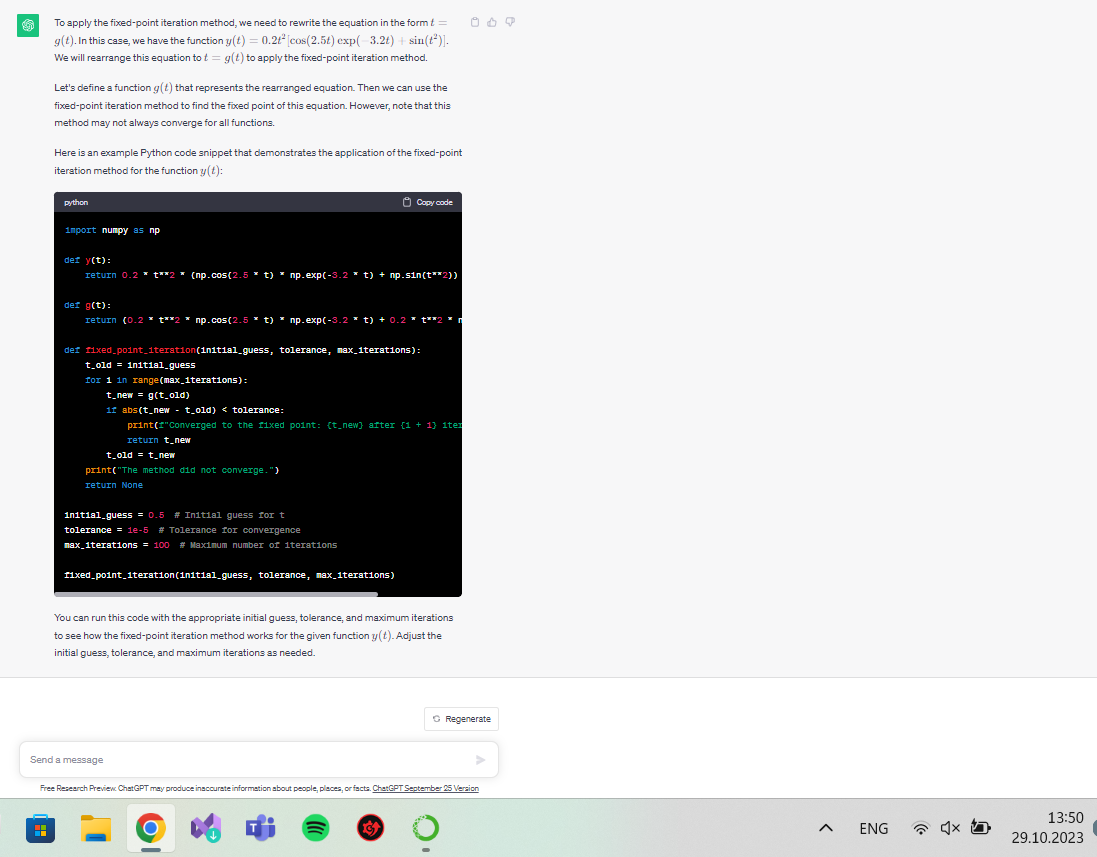